# 2. Hello Comets #

### a) Plot orbit ###

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [7]:
# adding objects
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Churyumov-Gerasimenko", m=5.03e-18)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


<IPython.core.display.Javascript object>


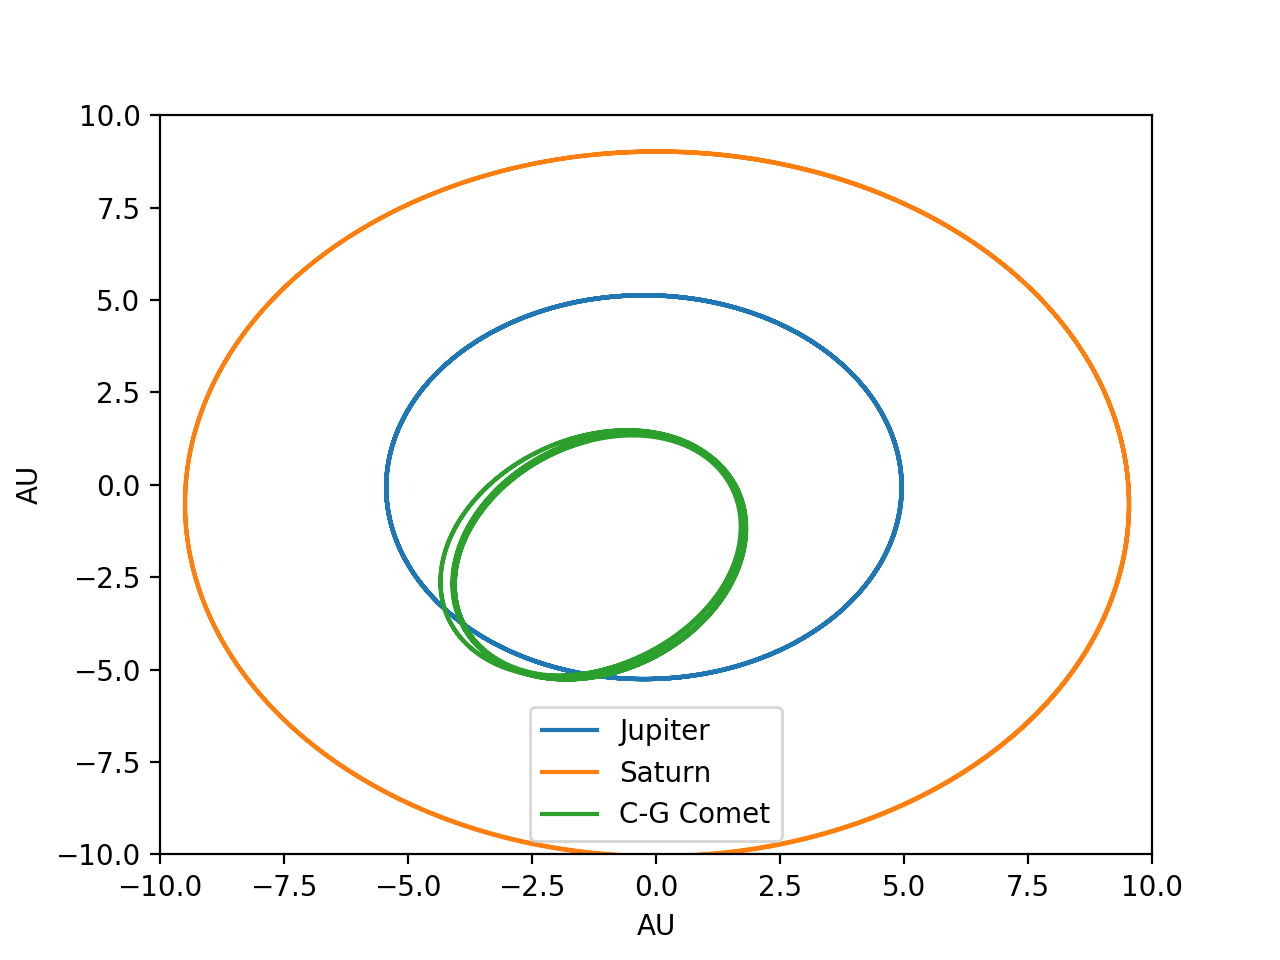

In [8]:
# setting up  integration
sim.dt = 0.01
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
Nobjects = 3
x = np.zeros((Nobjects,Noutputs))
y = np.zeros((Nobjects,Noutputs))
z = np.zeros((Nobjects,Noutputs))

sim.integrator = "ias15" 
sim.move_to_com()       
ps = sim.particles      

# integrating
for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(Nobjects):
        x[j][i] = ps[j+1].x 
        y[j][i] = ps[j+1].y
        z[j][i] = ps[j+1].z

plt.figure()
plt.plot(x[0], y[0], label = "Jupiter")
plt.plot(x[1], y[1], label = 'Saturn')
plt.plot(x[2], y[2], label = 'C-G Comet')
plt.xlim([-10,10])
plt.ylim([-10, 10])
plt.legend()
plt.xlabel('AU')
plt.ylabel('AU')
#plt.savefig('Orbits.png')
sim = None

### b) Testing Timestep  ###

Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


<IPython.core.display.Javascript object>


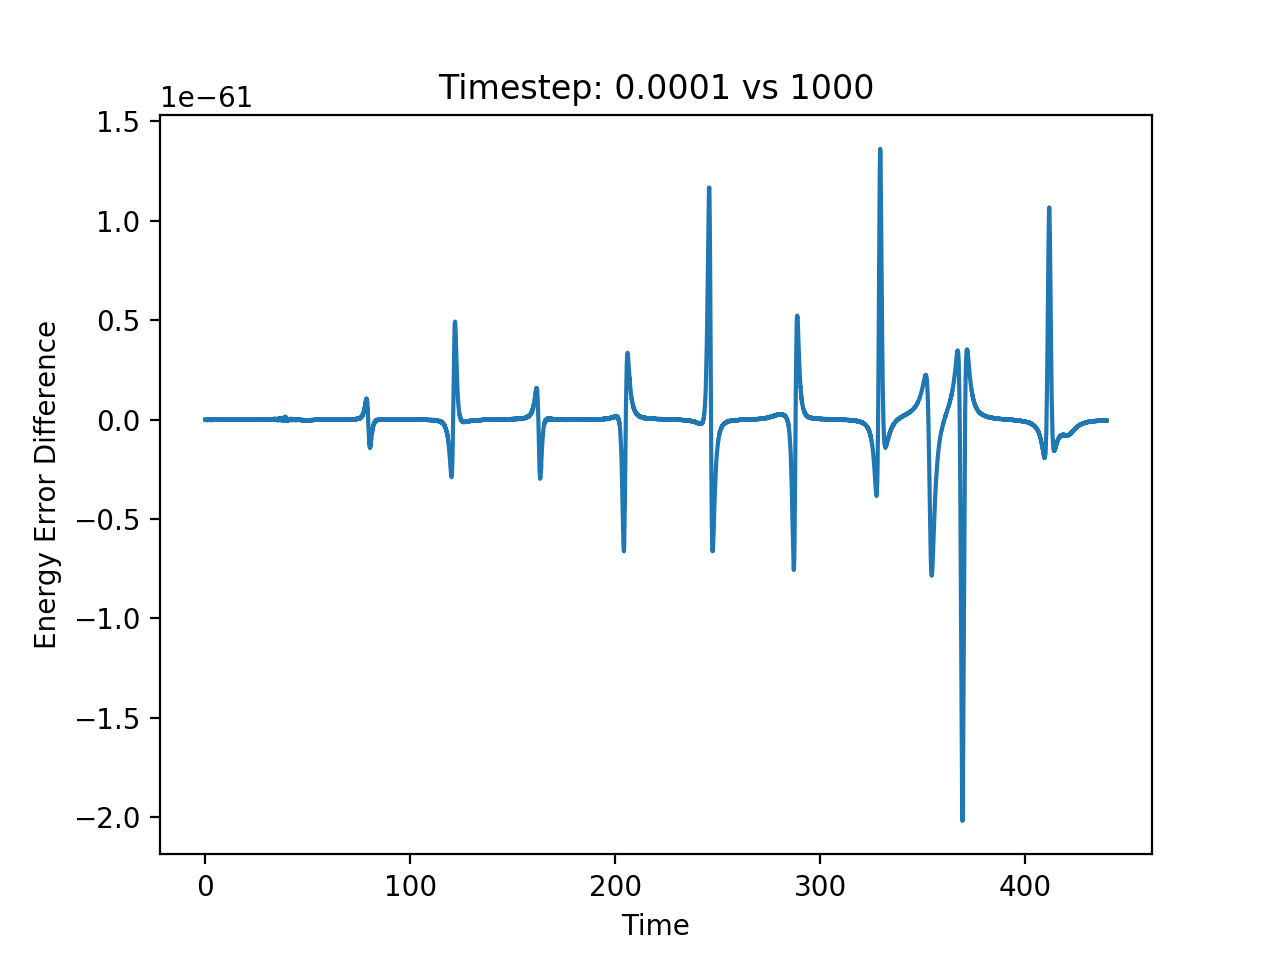

Text(0.5, 1.0, 'Timestep: 0.0001 vs 1000')

In [9]:
Noutputs = 10000
year = 2.*np.pi 
times = np.linspace(0.,70.*year, Noutputs)

def timestep_test(dt):
    sim = rebound.Simulation()
    sim.add("Churyumov-Gerasimenko", m=5.03e-18)
    sim.add("Sun")
    sim.add("Jupiter")
    sim.add("Saturn")
    
    sim.dt = dt
    
    sim.integrator = "ias15" 
    sim.move_to_com()       
    ps = sim.particles 
    E_diff = np.zeros(Noutputs)

    # integrating
    for i,time in enumerate(times):
        sim.integrate(time)
        if i ==0:        
            dist = np.sqrt(ps[0].x**2+ps[0].y**2+ps[0].z**2)
            v = np.sqrt(ps[0].vx**2+ps[0].vy**2+ps[0].vz**2)
            Ei = .5*ps[0].m*v**2-ps[0].m*ps[1].m/(dist)

            E_diff[i] = 0
        else:
            dist = np.sqrt(ps[0].x**2+ps[0].y**2+ps[0].z**2)
            v = np.sqrt(ps[0].vx**2+ps[0].vy**2+ps[0].vz**2)
            E = .5*ps[0].m*v**2-ps[0].m*ps[1].m/(dist)

            E_diff[i] = Ei - E
    sim=None    
    return E_diff

E_diff_0001 = timestep_test(0.0001)
E_diff_1000 = timestep_test(1000)
plt.figure()
plt.plot(times, E_diff_0001-E_diff_1000)
plt.xlabel('Time')
plt.ylabel('Energy Error Difference')
plt.title('Timestep: 0.0001 vs 1000')
#plt.savefig('timestep.png')

### b) Testing Integrator Choice ###

<IPython.core.display.Javascript object>


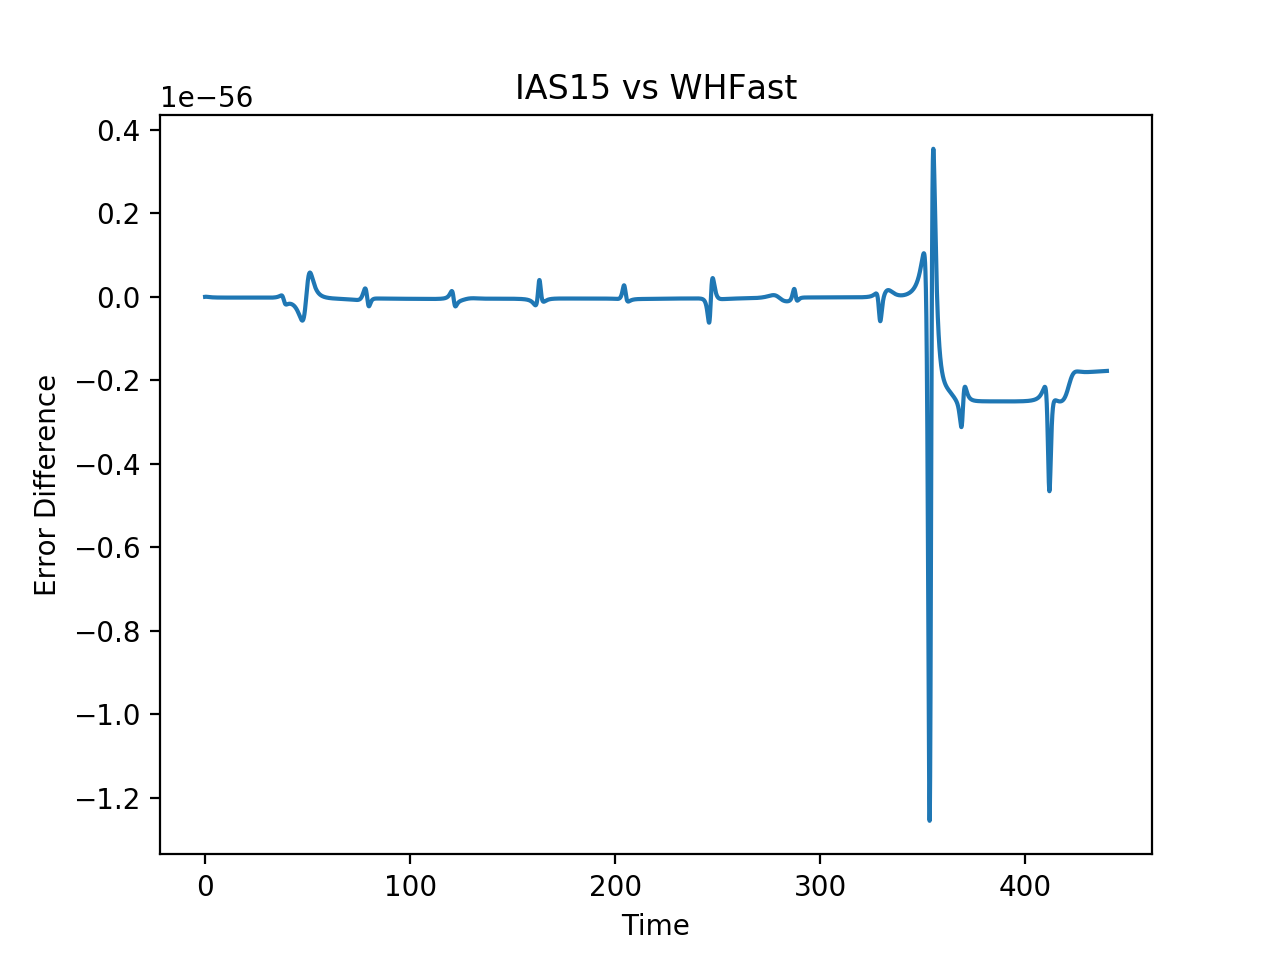

Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


Text(0.5, 1.0, 'IAS15 vs WHFast')

In [10]:
Noutputs = 10000
year = 2.*np.pi 
times = np.linspace(0.,70.*year, Noutputs)

def integrator_test(integrator):
    sim = rebound.Simulation()
    sim.add("Churyumov-Gerasimenko", m=5.03e-18)
    sim.add("Sun")
    sim.add("Jupiter")
    sim.add("Saturn")
    
    sim.integrator = integrator
    sim.move_to_com()       
    ps = sim.particles 
    E_diff = np.zeros(Noutputs)

    sim.dt = 0.01
    
    # integrating
    for i,time in enumerate(times):
        sim.integrate(time)
        if i ==0:        
            dist = np.sqrt(ps[0].x**2+ps[0].y**2+ps[0].z**2)
            v = np.sqrt(ps[0].vx**2+ps[0].vy**2+ps[0].vz**2)
            Ei = .5*ps[0].m*v**2-ps[0].m*ps[1].m/(dist)

            E_diff[i] = 0
        else:
            dist = np.sqrt(ps[0].x**2+ps[0].y**2+ps[0].z**2)
            v = np.sqrt(ps[0].vx**2+ps[0].vy**2+ps[0].vz**2)
            E = .5*ps[0].m*v**2-ps[0].m*ps[1].m/(dist)

            E_diff[i] = Ei - E
        
    return E_diff

plt.figure()
E_diff_ias = integrator_test('ias15')
E_diff_whfast = integrator_test('whfast')
plt.plot(times, E_diff_ias-E_diff_whfast)
plt.xlabel('Time')
plt.ylabel('Error Difference')
plt.title('IAS15 vs WHFast')
#plt.savefig('integrator.png')

### c) Adding Solar System Planets ###

Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for

<IPython.core.display.Javascript object>


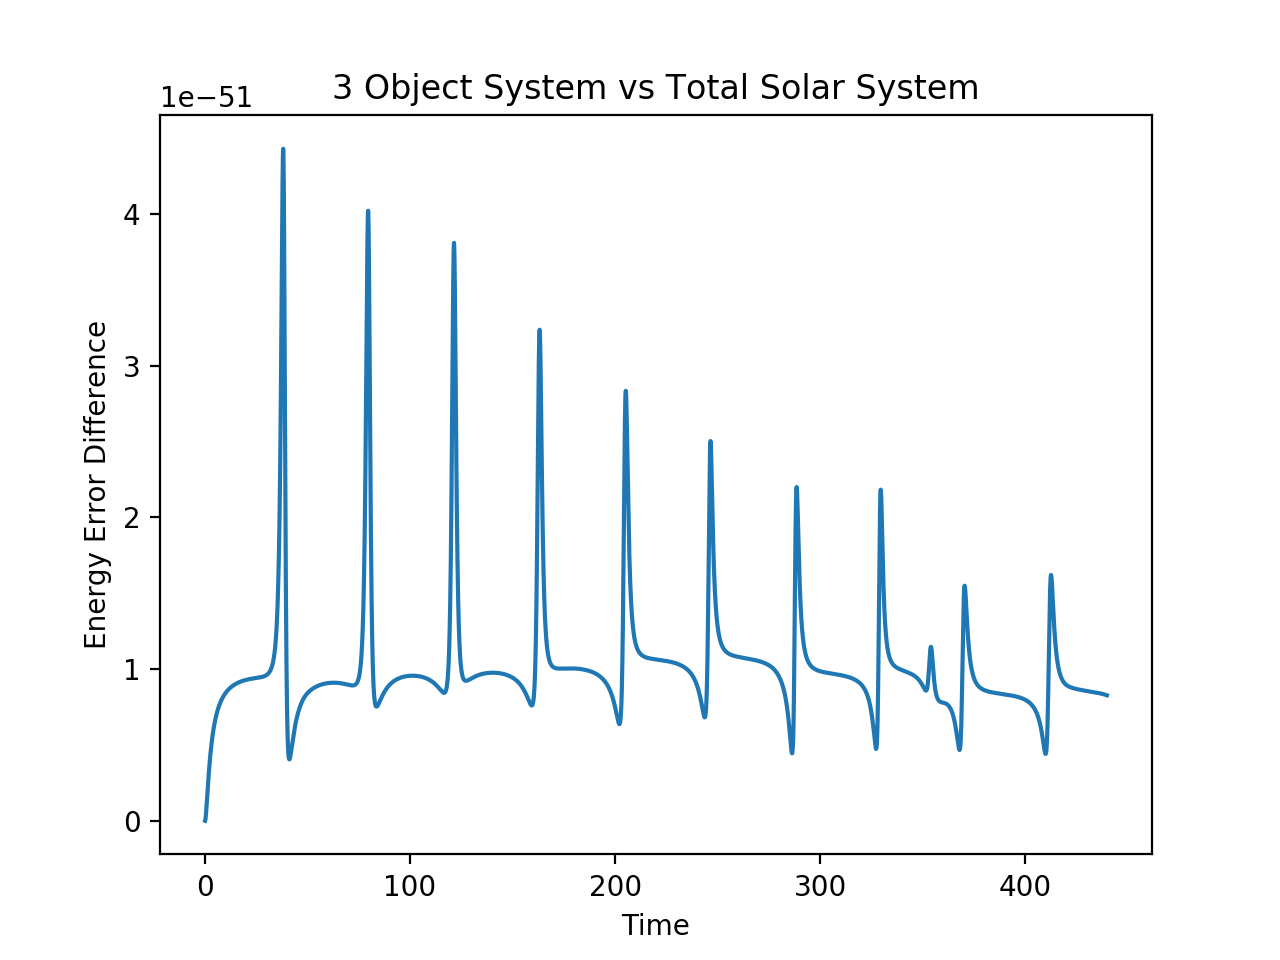

Text(0.5, 1.0, '3 Object System vs Total Solar System')

In [11]:
sim1 = rebound.Simulation()
sim1.add("Churyumov-Gerasimenko", m=5.03e-18)
sim1.add("Sun")
sim1.add("Jupiter")
sim1.add("Saturn")

sim2 = rebound.Simulation()
sim2.add("Churyumov-Gerasimenko", m=5.03e-18)
sim2.add("Sun")
sim2.add("Mercury")
sim2.add("Venus")
sim2.add("Earth")
sim2.add("Mars")
sim2.add("Jupiter")
sim2.add("Saturn")
sim2.add("Uranus")
sim2.add("Neptune")
sim2.add("Pluto")

# setting up  integration
sim1.dt = 0.01
sim2.dt = 0.01

Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
E1_diff = np.zeros(Noutputs)
E2_diff = np.zeros(Noutputs)

sim1.integrator = "ias15" 
sim1.move_to_com()       
ps1 = sim1.particles    

sim2.integrator = "ias15" 
sim2.move_to_com()       
ps2 = sim2.particles  

# integrating
for i,time in enumerate(times):
    sim1.integrate(time)
    sim2.integrate(time)
    if i ==0:  
        
        #calculating initial total energy
        dist1 = np.sqrt(ps1[0].x**2+ps1[0].y**2+ps1[0].z**2)
        v1 = np.sqrt(ps1[0].vx**2+ps1[0].vy**2+ps1[0].vz**2)
        Ei1 = .5*ps1[0].m*v1**2-ps1[0].m*ps1[1].m/(dist1)
                     
        dist2 = np.sqrt(ps2[0].x**2+ps2[0].y**2+ps2[0].z**2)
        v2 = np.sqrt(ps2[0].vx**2+ps2[0].vy**2+ps2[0].vz**2)
        Ei2 = .5*ps2[0].m*v2**2-ps2[0].m*ps2[1].m/(dist2)
        E1_diff[i] = 0
        E2_diff[i] = 0
    else:
        # calculating total energy
        dist1 = np.sqrt(ps1[0].x**2+ps1[0].y**2+ps1[0].z**2)
        v1 = np.sqrt(ps1[0].vx**2+ps1[0].vy**2+ps1[0].vz**2)
        E1 = .5*ps1[0].m*v1**2-ps1[0].m*ps1[1].m/(dist1)
        dist2 = np.sqrt(ps2[0].x**2+ps2[0].y**2+ps2[0].z**2)
        v2 = np.sqrt(ps2[0].vx**2+ps2[0].vy**2+ps2[0].vz**2)
        E2 = .5*ps2[0].m*v2**2-ps2[0].m*ps2[1].m/(dist2)
        
        # seeing how energy changes over the integration
        E1_diff[i] = Ei1 - E1
        E2_diff[i] = Ei2 - E2
        
plt.figure()
plt.plot(times[1:], np.abs(E1_diff[1:]-E2_diff[1:]))
plt.xlabel('Time')
plt.ylabel('Energy Error Difference')
plt.title('3 Object System vs Total Solar System')
#plt.savefig('objects.png')

# 3. Finding Planet X #

In [12]:
def planetX(mass):
    sim = rebound.Simulation()
    sim.add("Pluto")
    sim.add("Sun")
    sim.add("Mercury")
    sim.add("Venus")
    sim.add("Earth")
    sim.add("Mars")
    sim.add("Jupiter")
    sim.add("Saturn")
    sim.add("Uranus")
    sim.add("Neptune")
    sim.add(a=460, e=0.4, m=mass)
    sim.move_to_com()
    return sim

def noX():
    sim = rebound.Simulation()
    sim.add("Pluto")
    sim.add("Sun")
    sim.add("Mercury")
    sim.add("Venus")
    sim.add("Earth")
    sim.add("Mars")
    sim.add("Jupiter")
    sim.add("Saturn")
    sim.add("Uranus")
    sim.add("Neptune")
    sim.move_to_com()
    return sim

Noutputs = 10000
year = 2.*np.pi 
times = np.linspace(0., 10.*year, Noutputs)
dist = np.zeros(Noutputs)

sim = noX()
sim.dt = .01
ps = sim.particles 

# integrating regular system
for i,time in enumerate(times):
    sim.integrate(time)
    
    #pluto distance from sun
    dist[i]= np.sqrt(ps[0].x**2+ps[0].y**2+ps[0].z**2)

masses = np.logspace(-5, 1, num = 7)

for mass in masses:
    simX = planetX(mass)
    simX.dt = .01
    psX = simX.particles 
    distX = np.zeros(Noutputs)

    # integrating
    perturbations = []
    for i,time in enumerate(times):
        simX.integrate(time)
        #pluto distance from sun
        distX[i]= np.sqrt(psX[0].x**2+psX[0].y**2+psX[0].z**2)
        
        # finding difference between pluto radius w/o planet X vs with
        perturb = np.abs(dist[i]-distX[i])/dist[i]
        perturbations.append(perturb)
    print(' ')
    
    print('mass:', mass, 'perturbation percent:', 100*np.mean(perturbations))
    print(' ')

Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Plut

In [13]:
# narrowing down on mass range
masses = np.linspace(.01, .03, num = 7)

for mass in masses:
    simX = planetX(mass)
    simX.dt = .01
    psX = simX.particles 
    distX = np.zeros(Noutputs)

    # integrating
    perturbations = []
    for i,time in enumerate(times):
        simX.integrate(time)
        distX[i]= np.sqrt(psX[0].x**2+psX[0].y**2+psX[0].z**2)
        
        # finding difference between pluto radius w/o planet X vs with
        perturb = np.abs(dist[i]-distX[i])/dist[i]
        perturbations.append(perturb)
    print(' ')
    
    print('mass:', mass, 'perturbation percent:', 100*np.mean(perturbations))
    print(' ')

Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
 
mass: 0.01 perturbation percent: 4.06183341577462

In [14]:
 # jupiter mass
ps[6]

<rebound.particle.Particle object at 0x7fbb7b6f84d0, m=0.0009547919099366768 x=1.3086834669535572 y=-5.019817052947493 z=-0.008371642548378605 vx=0.419244848934631 vy=0.1313230724383682 vz=-0.009926717891442687>

In [15]:
 # how many Jupiters?
0.028/0.00095479

29.325820337456406